In [5]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
run = '5'

filt_file = f"../logs/real/filt/{run}.log"

df = pd.read_csv(filt_file, header=None, names=['tag', 'ts', 'v1', 'v2', 'v3', 'v4'])


df_o = df[df.tag == 'pos']
df_o = df_o.rename({'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'}, axis=1)
df_o = df_o.drop(['tag', 'ts'], axis=1)

df_u = df[df.tag == 'input']
df_u = df_u.rename({'v1' : 'roll', 'v2' : 'pitch', 'v3' : 'yaw', 'v4' : 'throttle'}, axis=1)
df_u



dt = 0.02
# df_u = df_u.drop(['tag', 'ts'], axis=1)


In [8]:
# dx = c_hor*(cos(a+e_a)*pitch - sin(a + e_a)*roll)
# dy = c_hor*(sin(a+e_a)*pitch + cos(a + e_a)*roll)
# dz = c_ver*throttle
# da = c_ang*yaw

p_a = 0

x, y, z, a = [df_o[v].to_numpy() for v in ['x', 'y', 'z', 'a']]
roll, pitch, yaw, throttle = [df_u[v].to_numpy() for v in ['roll', 'pitch', 'yaw', 'throttle']]

shift = 25

x, y, z, a = [v[shift:] for v in [x, y, z, a]]

roll, pitch, yaw, throttle = [v[:-shift] for v in [roll, pitch, yaw, throttle]]



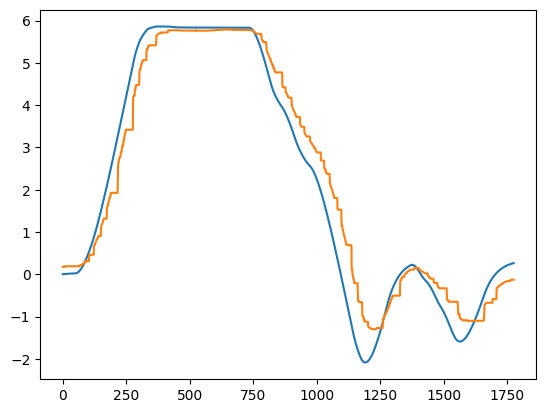

In [11]:
dx = np.cos(a + p_a)*pitch - np.sin(a + p_a)*-roll
plt.plot(1.5*np.cumsum(dx*dt))
plt.plot(x+0.9)
plt.show()

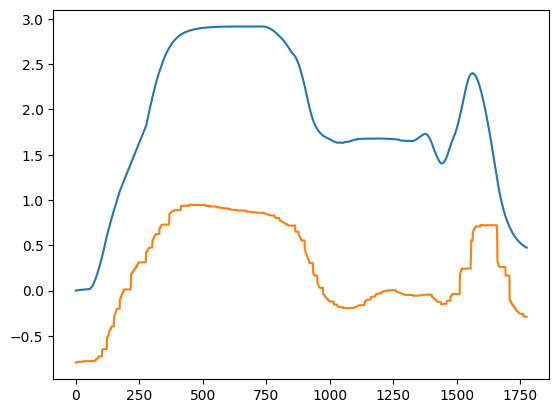

In [12]:
dy = np.sin(a + p_a)*pitch + np.cos(a + p_a)*-roll
plt.plot(1.5*np.cumsum(dy*dt))
plt.plot(y+1.6)
plt.show()

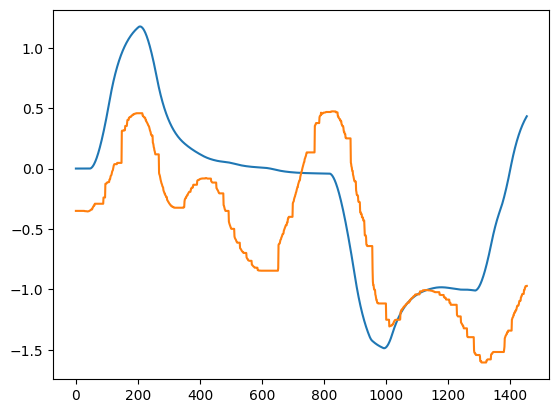

In [381]:
dz = throttle - 0.05*np.sqrt(pitch**2 + roll**2)
plt.plot(1*np.cumsum(dz*dt))
plt.plot(z-1.8)
plt.show()

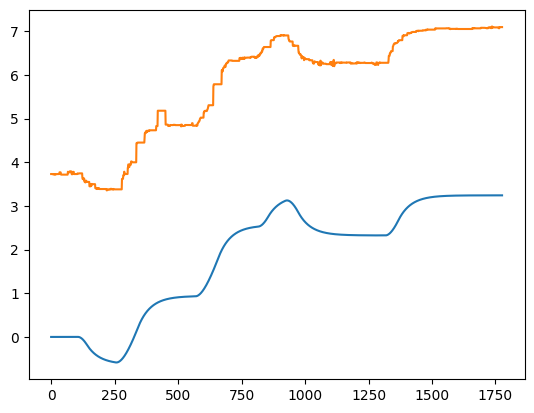

In [13]:
da = yaw
plt.plot(0.9*np.cumsum(da*dt))
plt.plot(a+3.14)
plt.show()